In [1]:
##########
# Imports
##########

import pandas as pd


In [3]:
# Read in train.csv to dataframe
train_csv = pd.read_csv('train.csv')
train_csv

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14.0,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14.0,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3.0,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0.0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14.0,R10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
61247,571ffeb5344b749ef4e99c75b8449a86,Nodule/Mass,8.0,R9,1723.0,849.0,1795.0,943.0
61248,5e194561328ca9c3336e33297698d21f,No finding,14.0,R11,NaN,NaN,NaN,NaN
61249,d8d873b275543b0d2d894958e37f09ec,No finding,14.0,R4,NaN,NaN,NaN,NaN
61250,30cf440566432d0f579a2a10bb3f3bf3,Pleural thickening,11.0,R10,198.0,1292.0,341.0,1497.0


In [4]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61252 entries, 0 to 61251
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_id    61252 non-null  object 
 1   class_name  61251 non-null  object 
 2   class_id    61251 non-null  float64
 3   rad_id      61251 non-null  object 
 4   x_min       32532 non-null  float64
 5   y_min       32532 non-null  float64
 6   x_max       32532 non-null  float64
 7   y_max       32532 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.7+ MB


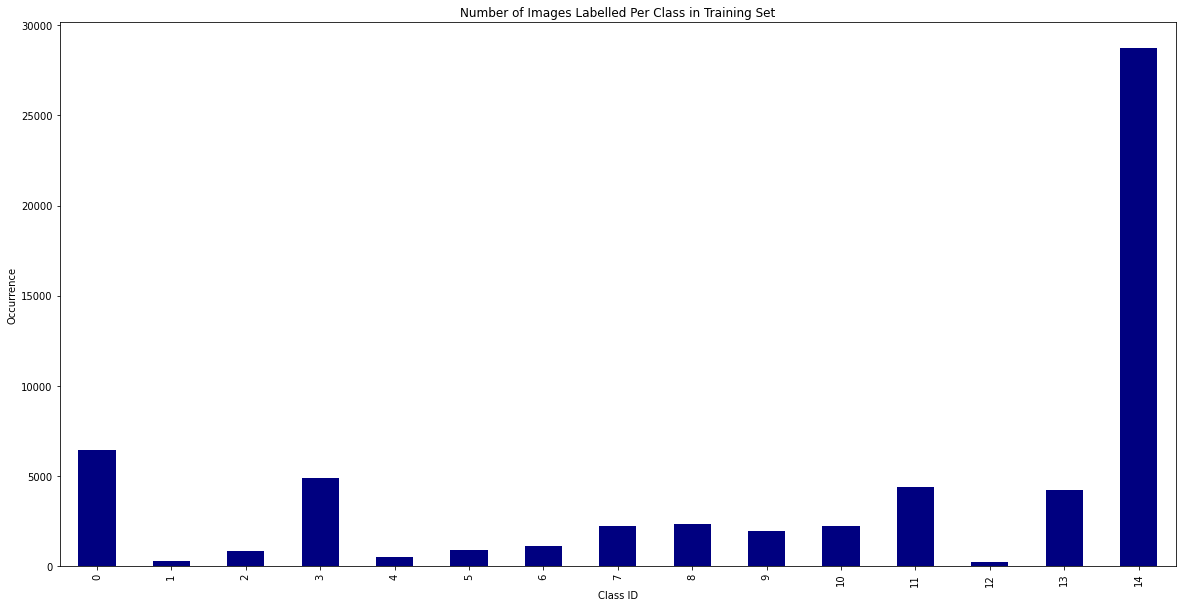

In [8]:
# Plot occurrence of each class
xticks = range(15)
ax = train_csv.groupby('class_id').count().image_id.plot(colormap='jet', 
                                                         kind='bar', 
                                                         figsize=(20,10), 
                                                         xlabel='Class ID', 
                                                         ylabel='Occurrence', 
                                                         title='Number of Images Labelled Per Class in Training Set', 
                                                         fontsize=10,
                                                         xticks=xticks)
                                                      

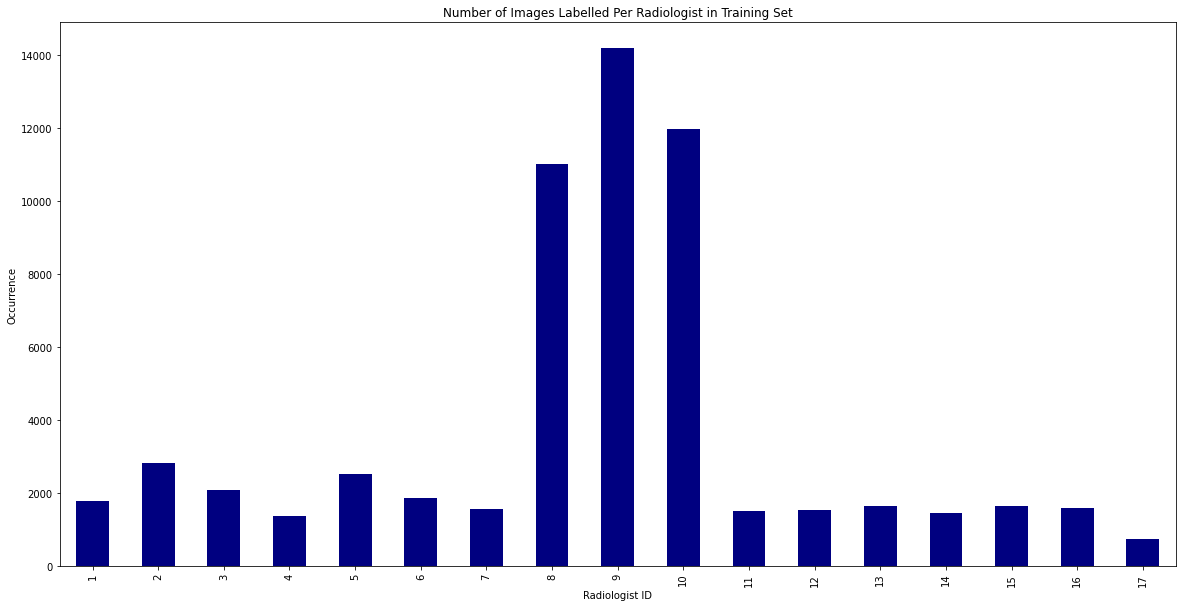

In [31]:
rad_count = train_csv.groupby('rad_id').count().image_id
new_index = [int(val[1:]) for val in rad_count.index.to_list()]
rad_count.index = new_index
rad_count = rad_count.sort_index()

# Plot occurrence of each radiologist
ax2 = rad_count.plot(colormap='jet',  kind='bar', 
                                      figsize=(20,10),
                                      xlabel='Radiologist ID',
                                      ylabel='Occurrence',
                                      title='Number of Images Labelled Per Radiologist in Training Set',
                                      fontsize=10)